In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# Where have there been big cuts?

In [2]:
combined = pd.read_csv("output/5_combined.csv").set_index(["City","report_year"])
combined.loc["BRIDGEPORT"]

,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank
report_year,,,,,,,,,,
2002,1071.5,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,165.0
2003,2794.9,NaN,1243.6,111.2,False,NaN,NaN,NaN,NaN,165.0
2004,2916.3,NaN,1238.0,111.2,False,NaN,NaN,NaN,140283857.0,165.0
2005,2937.4,NaN,1186.6,110.4,False,NaN,NaN,NaN,141629003.0,165.0
2006,2966.7,NaN,1213.2,115.4,False,NaN,NaN,NaN,145606964.0,165.0
2007,2854.1,NaN,1176.2,112.2,False,211764417.0,203566550.0,22224.65,146274743.0,165.0
2008,2910.5,20958.0,1187.2,119.4,False,218222813.0,209554648.0,21801.84,153919745.0,165.0
2009,2977.8,20596.0,1204.1,125.2,False,222867074.0,214369477.0,21288.93,161366656.0,165.0
2010,3011.3,20307.0,1167.9,128.0,False,205130582.0,185155817.0,21022.70,162835866.0,165.0


In [3]:
combined = combined[combined.index.map(lambda x: x[1] in range(2007,2017))]

In [4]:
def adjust(df, col, adjust_col="Enrollment"):
    
    ret = df.copy()
    
    return ret[col] / ret[adjust_col]
    
combined["ed_spending_per_student"] = adjust(combined, "Education spending")
combined.head()
    

FTE Count  EDSIGHT_ENROLLMENT  Teacher FTE Count  \
City    report_year                                                     
ANDOVER 2007              60.9                 NaN               23.8   
        2008              58.0               347.0               25.3   
        2009              59.4               334.0               25.3   
        2010              60.0               336.0               26.3   
        2011              59.7               334.0               26.3   

                     Counselor FTE Count has_nulls  Education spending  \
City    report_year                                                      
ANDOVER 2007                         NaN      True           7507964.0   
        2008                         NaN      True           8829049.0   
        2009                         NaN      True           8056856.0   
        2010                         NaN      True           7844581.0   
        2011                         NaN      True           8009858.0   

                     Inter_Gov_Rev  Enrollment  Grant Payments  wealth_rank  \
City    report_year                                                           
ANDOVER 2007             2438728.0      645.40             NaN        108.0   
        2008             3810247.0      642.14             NaN        108.0   
        2009             2720551.0      641.76             NaN        108.0   
        2010             2378006.0      631.35             NaN        108.0   
        2011             2431822.0      636.48             NaN        108.0   

                     ed_spending_per_student  
City    report_year                           
ANDOVER 2007                    11633.039975  
        2008                    13749.414458  
        2009                    12554.313139  
        2010                    12425.090679  
        2011                    12584.618527

In [5]:
combined["grants_per_student"] = adjust(combined, "Grant Payments")
combined.sample(5)

FTE Count  EDSIGHT_ENROLLMENT  Teacher FTE Count  \
City       report_year                                                     
NEW LONDON 2010             482.9              3020.0              185.9   
           2008             482.9              2933.0              184.4   
PLYMOUTH   2012             322.0              1665.0              114.8   
SOUTHBURY  2011               NaN                 NaN                NaN   
MADISON    2007             556.6                 NaN              243.4   

                        Counselor FTE Count has_nulls  Education spending  \
City       report_year                                                      
NEW LONDON 2010                        18.8     False          39208343.0   
           2008                        18.3     False          52721171.0   
PLYMOUTH   2012                         8.0     False          25174301.0   
SOUTHBURY  2011                         NaN       NaN          41616763.0   
MADISON    2007                        15.6     False          41242537.0   

                        Inter_Gov_Rev  Enrollment  Grant Payments  \
City       report_year                                              
NEW LONDON 2010            34147546.0     3467.50      22321148.0   
           2008            48716788.0     3380.86      21283462.0   
PLYMOUTH   2012            13940909.0     1819.80       9755606.0   
SOUTHBURY  2011             2882833.0     3082.55             NaN   
MADISON    2007             4817458.0     3947.20       1110094.0   

                        wealth_rank  ed_spending_per_student  \
City       report_year                                         
NEW LONDON 2010               164.0             11307.380822   
           2008               164.0             15594.011879   
PLYMOUTH   2012               145.0             13833.553687   
SOUTHBURY  2011                57.0             13500.758463   
MADISON    2007                24.0             10448.555178   

                        grants_per_student  
City       report_year                      
NEW LONDON 2010                6437.245278  
           2008                6295.280491  
PLYMOUTH   2012                5360.812177  
SOUTHBURY  2011                        NaN  
MADISON    2007                 281.235813

In [6]:
combined["intergov_per_student"] = adjust(combined, "Inter_Gov_Rev")
combined.sample(5)

,,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,ed_spending_per_student,grants_per_student,intergov_per_student
City,report_year,,,,,,,,,,,,,
CHAPLIN,2013,41.1,185.0,15.4,1.0,True,5931939.0,2611637.0,298.57,NaN,136.0,19867.833339,NaN,8747.151422
WOODBURY,2012,NaN,NaN,NaN,NaN,NaN,20480193.0,1317658.0,1330.74,NaN,49.0,15390.078453,NaN,990.169379
TRUMBULL,2012,1046.1,6959.0,407.5,44.4,False,99657036.0,16295453.0,6799.25,3064745.0,41.0,14657.063058,450.747509,2396.654484
MARLBOROUGH,2007,99.3,NaN,41.0,2.6,False,13785208.0,3445362.0,1170.07,NaN,78.0,11781.524182,NaN,2944.577675
CANTERBURY,2014,106.4,464.0,37.1,3.0,True,12162679.0,6600658.0,659.64,4740458.0,132.0,18438.358802,7186.431993,10006.455036


In [7]:
combined[["wealth_rank","intergov_per_student"]].corr()

,wealth_rank,intergov_per_student
wealth_rank,1.000000,0.844509
intergov_per_student,0.844509,1.000000


# Strong tie between wealth rank and intergov per student

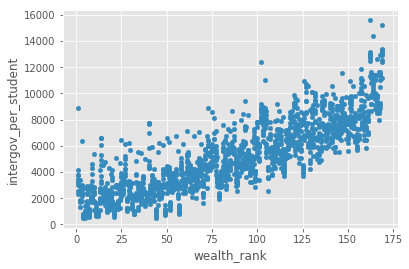

In [8]:
combined.plot.scatter("wealth_rank","intergov_per_student")

# Wealth rank versus spending per student

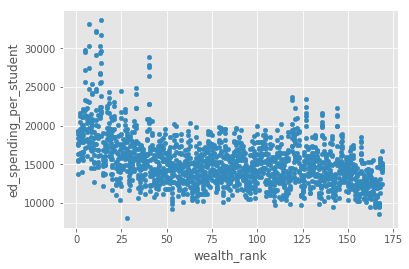

In [9]:
combined.plot.scatter("wealth_rank","ed_spending_per_student")

# Wealth rank versus grants per student

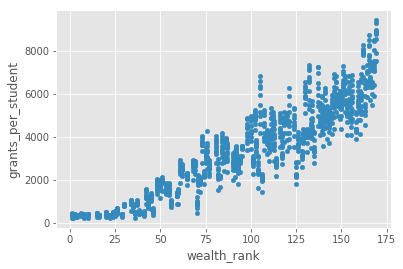

In [10]:
combined.plot.scatter("wealth_rank","grants_per_student",title="")

In [11]:
combined[["wealth_rank","grants_per_student"]].corr()

,wealth_rank,grants_per_student
wealth_rank,1.000000,0.918707
grants_per_student,0.918707,1.000000


In [12]:
combined["grants_per_student_dollar"] = adjust(combined,"grants_per_student","ed_spending_per_student")
combined.sample(5)

FTE Count  EDSIGHT_ENROLLMENT  Teacher FTE Count  \
City        report_year                                                     
COLEBROOK   2010              27.1               119.0                8.2   
LISBON      2014              77.9               402.0               29.1   
BRIDGEWATER 2016               NaN                 NaN                NaN   
MIDDLEFIELD 2010               NaN                 NaN                NaN   
            2009               NaN                 NaN                NaN   

                         Counselor FTE Count has_nulls  Education spending  \
City        report_year                                                      
COLEBROOK   2010                         0.4      True           3754811.0   
LISBON      2014                         1.8      True          10157341.0   
BRIDGEWATER 2016                         NaN       NaN           4368358.0   
MIDDLEFIELD 2010                         NaN       NaN          10358074.0   
            2009                         NaN       NaN          10666570.0   

                         Inter_Gov_Rev  Enrollment  Grant Payments  \
City        report_year                                              
COLEBROOK   2010              833648.0      255.02             NaN   
LISBON      2014             5004354.0      619.27       3934014.0   
BRIDGEWATER 2016              222017.0      136.23             NaN   
MIDDLEFIELD 2010             2135948.0      738.16             NaN   
            2009             2460323.0      736.04             NaN   

                         wealth_rank  ed_spending_per_student  \
City        report_year                                         
COLEBROOK   2010                88.0             14723.594228   
LISBON      2014               105.0             16402.120238   
BRIDGEWATER 2016                11.0             32066.050062   
MIDDLEFIELD 2010                80.0             14032.288393   
            2009                80.0             14491.834683   

                         grants_per_student  intergov_per_student  \
City        report_year                                             
COLEBROOK   2010                        NaN           3268.951455   
LISBON      2014                 6352.66362           8081.053498   
BRIDGEWATER 2016                        NaN           1629.721794   
MIDDLEFIELD 2010                        NaN           2893.611141   
            2009                        NaN           3342.648497   

                         grants_per_student_dollar  
City        report_year                             
COLEBROOK   2010                               NaN  
LISBON      2014                          0.387307  
BRIDGEWATER 2016                               NaN  
MIDDLEFIELD 2010                               NaN  
            2009                               NaN

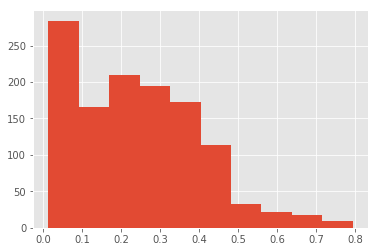

In [13]:
combined["grants_per_student_dollar"].hist()

In [14]:
combined["grants_per_student_dollar"].describe()

count    1220.000000
mean        0.240524
std         0.164513
min         0.012954
25%         0.101718
50%         0.224315
75%         0.361801
max         0.793816
Name: grants_per_student_dollar, dtype: float64

# Dependence on grants versus wealth rank

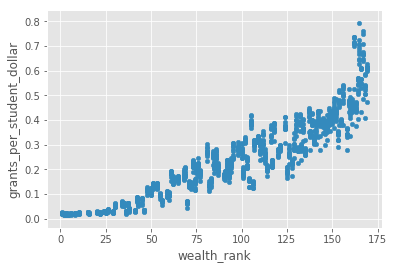

In [15]:
combined.plot.scatter("wealth_rank","grants_per_student_dollar",title="")

In [16]:
combined["intergov_per_student_dollar"] = adjust(combined,"intergov_per_student","ed_spending_per_student")
combined.sample(5)

,,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,ed_spending_per_student,grants_per_student,intergov_per_student,grants_per_student_dollar,intergov_per_student_dollar
City,report_year,,,,,,,,,,,,,,,
BROOKFIELD,2010,374.7,2906.0,174.3,12.3,False,36461447.0,4975659.0,2988.01,1525479.0,38.0,12202.585333,510.533432,1665.208282,0.041838,0.136464
NEW CANAAN,2013,763.0,4223.0,301.1,29.1,False,82762324.0,10875400.0,4220.54,1545870.0,2.0,19609.415857,366.273036,2576.779275,0.018678,0.131405
THOMASTON,2013,171.1,1017.0,71.0,6.0,False,15702579.0,8104930.0,1163.48,5685133.0,134.0,13496.217382,4886.317771,6966.110290,0.362051,0.516153
EAST HAMPTON,2009,343.9,2064.0,125.0,11.0,False,27066537.0,11503080.0,2066.07,7598829.0,86.0,13100.493691,3677.914591,5567.613876,0.280746,0.424993
SHELTON,2007,793.2,NaN,322.3,27.3,False,63138300.0,11460555.0,5775.33,4331650.0,56.0,10932.414252,750.026405,1984.398294,0.068606,0.181515


# Dependence on intergov versus wealth rank

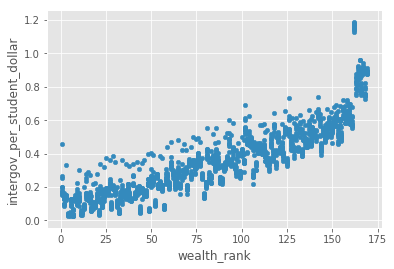

In [17]:
combined.plot.scatter("wealth_rank","intergov_per_student_dollar",title="")

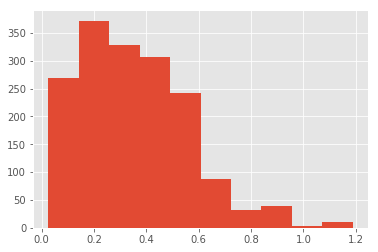

In [18]:
combined["intergov_per_student_dollar"].hist()

In [19]:
combined["intergov_per_student_dollar_change"] = combined["intergov_per_student_dollar"].groupby(level=0).diff()

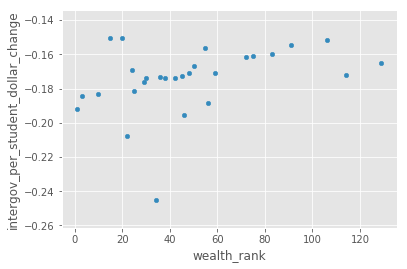

In [20]:
combined[combined["intergov_per_student_dollar_change"] < -.15].plot.scatter("wealth_rank","intergov_per_student_dollar_change",title="")

In [21]:
combined[combined.index.map(lambda x: x[1] != 2009)].sort_values(by="intergov_per_student_dollar_change")

,,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,ed_spending_per_student,grants_per_student,intergov_per_student,grants_per_student_dollar,intergov_per_student_dollar,intergov_per_student_dollar_change
City,report_year,,,,,,,,,,,,,,,,
GREENWICH,2010,1507.6,8863.0,628.8,62.8,False,135277746.0,20301905.0,8712.22,3280424.0,1.0,15527.356518,376.531355,2330.279194,0.024250,0.150076,-0.118971
BOZRAH,2008,50.8,269.0,20.0,0.5,True,4998002.0,2072796.0,391.58,1182310.0,117.0,12763.680474,3019.331937,5293.416416,0.236557,0.414725,-0.097395
PLAINFIELD,2010,452.5,2737.0,155.2,20.0,False,35255529.0,20974487.0,2572.90,15353320.0,152.0,13702.642543,5967.320922,8152.080143,0.435487,0.594928,-0.096512
ANSONIA,2014,391.7,2338.0,145.0,13.0,False,35784832.0,28229568.0,2528.60,15824433.0,163.0,14152.033536,6258.179625,11164.109784,0.442211,0.788870,-0.089009
HAMDEN,2010,1010.0,5997.0,399.3,44.9,False,83759620.0,40619842.0,6883.82,22925180.0,135.0,12167.607520,3330.299165,5900.770502,0.273702,0.484957,-0.085820
SOMERS,2010,145.3,1660.0,102.8,7.5,True,19932606.0,10820107.0,1634.39,5908969.0,126.0,12195.746425,3615.397182,6620.272395,0.296447,0.542835,-0.083525
HARWINTON,2010,NaN,NaN,NaN,NaN,NaN,10978122.0,3737842.0,935.80,NaN,67.0,11731.269502,NaN,3994.274418,NaN,0.340481,-0.081986
LYME,2015,NaN,NaN,NaN,NaN,NaN,6556450.0,427660.0,294.87,NaN,17.0,22235.052735,NaN,1450.334046,NaN,0.065227,-0.080882
SUFFIELD,2010,368.0,2570.0,167.3,11.6,False,31917228.0,13067296.0,2440.64,6021416.0,93.0,13077.401010,2467.146322,5354.044841,0.188657,0.409412,-0.080599


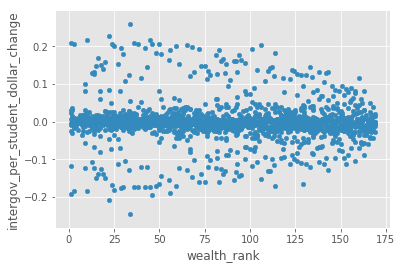

In [22]:
combined.plot.scatter("wealth_rank","intergov_per_student_dollar_change")

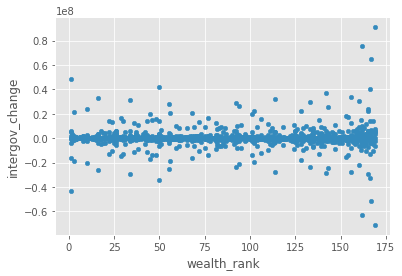

In [23]:
combined["intergov_change"] = combined["Inter_Gov_Rev"].groupby(level=0).diff()
combined.plot.scatter("wealth_rank","intergov_change")

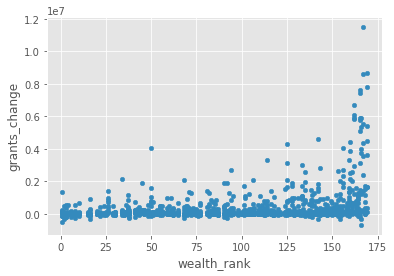

In [24]:
combined["grants_change"] = combined["Grant Payments"].groupby(level=0).diff()
combined.plot.scatter("wealth_rank","grants_change")

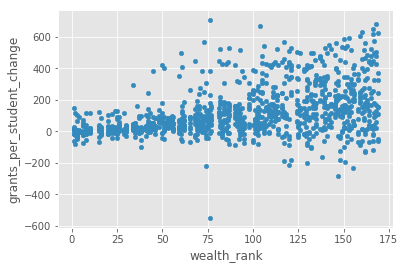

In [25]:
combined["grants_per_student_change"] = combined["grants_per_student"].groupby(level=0).diff()
combined.plot.scatter("wealth_rank","grants_per_student_change")

In [62]:
combined[combined.index.map(lambda x: x[1] == 2017)]#["grants_per_student_change"]

,,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,ed_spending_per_student,grants_per_student,intergov_per_student,grants_per_student_dollar,intergov_per_student_dollar,intergov_per_student_dollar_change,intergov_change,grants_change,grants_per_student_change,grants_per_student_dollar_change
City,report_year,,,,,,,,,,,,,,,,,,,,


In [26]:
combined["grants_per_student_dollar_change"] = combined["grants_per_student_dollar"].groupby(level=0).diff()

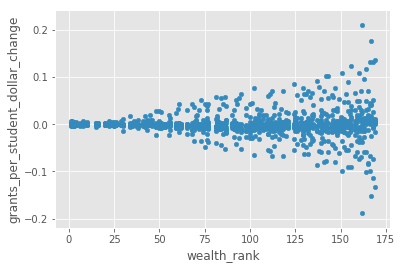

In [27]:
combined.plot.scatter("wealth_rank","grants_per_student_dollar_change")

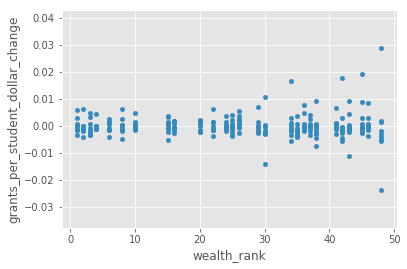

In [28]:
combined[combined["wealth_rank"] < 50].plot.scatter("wealth_rank","grants_per_student_dollar_change")

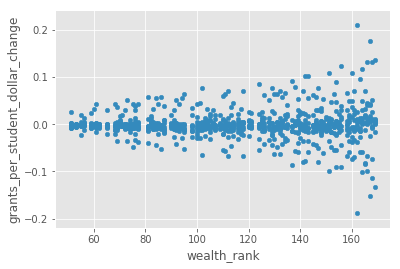

In [29]:
combined[combined["wealth_rank"] > 50].plot.scatter("wealth_rank","grants_per_student_dollar_change")

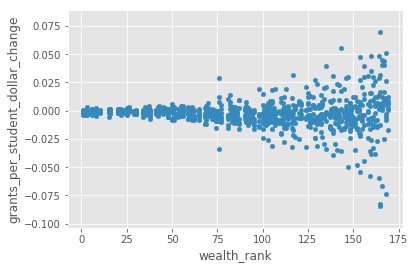

In [30]:
combined[(combined.index.map(lambda x: x[1] not in [2008,2009]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change"
)

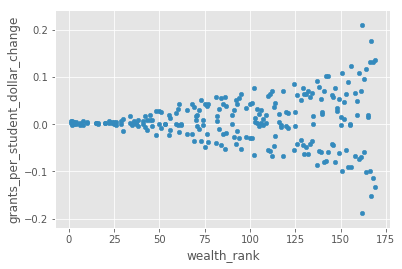

In [31]:
combined[(combined.index.map(lambda x: x[1] in [2008,2009]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change"
)

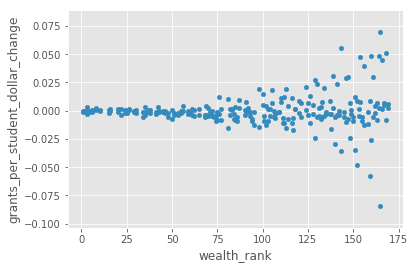

In [32]:
combined[(combined.index.map(lambda x: x[1] in [2010,2011]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change"
)

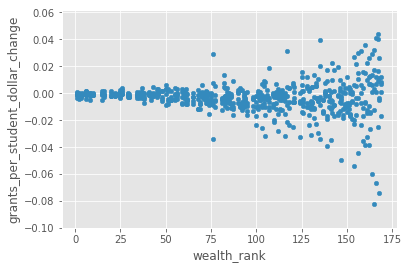

In [33]:
combined[(combined.index.map(lambda x: x[1] in [2012,2013,2014,2015,2016]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change"
)

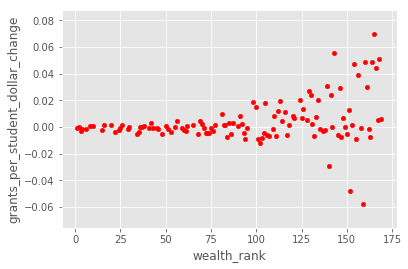

In [34]:
combined[(combined.index.map(lambda x: x[1] in [2010]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change",
    color = ["red"]
)

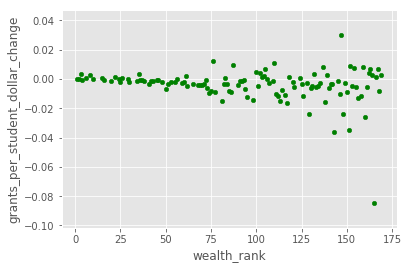

In [35]:
combined[(combined.index.map(lambda x: x[1] in [2011]))].plot.scatter(
    "wealth_rank",
    "grants_per_student_dollar_change",
    color = ["green"]
)

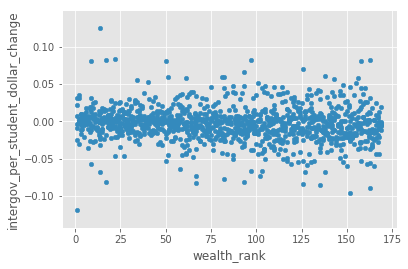

In [36]:
combined[(combined.index.map(lambda x: x[1] not in [2008,2009]))].plot.scatter("wealth_rank","intergov_per_student_dollar_change")

In [37]:
combined["grants_per_student_dollar_change"].mean()

-0.0002969860632659569

In [38]:
combined["grants_per_student_dollar_change"].describe()

count    1098.000000
mean       -0.000297
std         0.027462
min        -0.188457
25%        -0.006908
50%        -0.001408
75%         0.003397
max         0.210165
Name: grants_per_student_dollar_change, dtype: float64

In [39]:
combined["intergov_per_student_dollar_change"].mean()

-0.0006936051313766716

In [40]:
combined[
    (combined["intergov_per_student_dollar_change"] < -0.1)
    | (combined["intergov_per_student_dollar_change"] > 0.1)
]

FTE Count  EDSIGHT_ENROLLMENT  Teacher FTE Count  \
City          report_year                                                     
ANDOVER       2008              58.0               347.0               25.3   
ASHFORD       2008              95.8               505.0               37.6   
              2009              97.0               488.0               39.6   
AVON          2008             465.6              3612.0              212.4   
              2009             506.8              3569.0              216.6   
BARKHAMSTED   2008              56.1               358.0               20.7   
BERLIN        2008             472.9              3275.0              196.7   
              2009             485.2              3223.0              203.7   
BETHEL        2008             469.7              3157.0              212.4   
              2009             475.6              3087.0              207.8   
BLOOMFIELD    2008             489.4              2240.0              170.4   
BOLTON        2008             164.6               876.0               68.5   
              2009             164.6               869.0               67.4   
BRANFORD      2008             568.3              3514.0              249.0   
              2009             578.8              3515.0              245.5   
BRISTOL       2008            1258.2              8980.0              530.9   
BROOKFIELD    2008             443.6              2955.0              183.0   
              2009             435.8              2952.0              182.1   
CANAAN        2008              81.8               359.0               43.6   
              2009              78.4                85.0               41.2   
CANTON        2008             304.6              1739.0              100.0   
              2009             308.2              1761.0              102.5   
CLINTON       2008             338.4              2113.0              148.3   
              2009             347.3              2091.0              150.9   
COLUMBIA      2008             116.9               593.0               48.0   
CORNWALL      2008              29.2               129.0               14.7   
              2009              28.3               122.0               13.7   
              2012              30.0               106.0               15.2   
COVENTRY      2008             315.1              2016.0              123.1   
              2009             318.6              1962.0              126.4   
...                              ...                 ...                ...   
SOUTHINGTON   2009            1018.9              6866.0              433.9   
STAFFORD      2008             355.2              1917.0              126.8   
              2009             368.0              1918.0              130.0   
STRATFORD     2008             974.7              7440.0              448.5   
              2009             969.0              7367.0              440.7   
SUFFIELD      2008             360.8              2594.0              167.5   
              2009             383.9              2579.0              170.7   
THOMASTON     2008             192.5              1272.0               82.6   
TOLLAND       2008             459.2              3143.0              190.6   
              2009             463.3              3159.0              190.3   
TORRINGTON    2009             729.5              4758.0              290.5   
VERNON        2008             600.9              3722.0              254.1   
              2009             605.0              3606.0              252.2   
WALLINGFORD   2008            1120.8              6855.0              459.9   
              2009            1125.0              6828.0              457.5   
WATERFORD     2008             497.5              2954.0              197.5   
              2009             482.3              2900.0              196.7   
WATERTOWN     2008             484.2              3412.0              197.1  

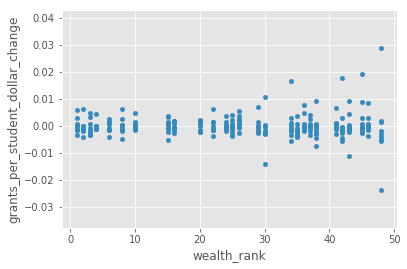

In [41]:
combined[combined["wealth_rank"] < 50].plot.scatter("wealth_rank","grants_per_student_dollar_change")

In [42]:
import random


In [43]:
# combined["grants_per_student_dollar_change"] = combined["grants_per_student_dollar"].diff()
# combined["intergov_per_student_dollar_change"] = combined["intergov_per_student_dollar"].diff()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c4eae90>]],
      dtype=object)

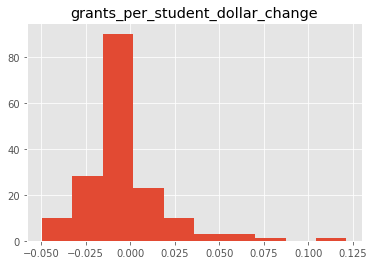

In [44]:
combined.groupby(level=0).agg({"grants_per_student_dollar_change":sum}).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a092f50>]],
      dtype=object)

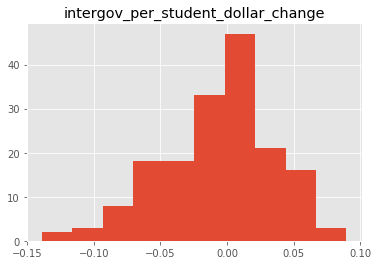

In [45]:
combined.groupby(level=0).agg({"intergov_per_student_dollar_change":sum}).hist()

In [46]:
combined.groupby(level=0).agg({"intergov_per_student_dollar_change":sum}).sort_values(by="intergov_per_student_dollar_change").head()

,intergov_per_student_dollar_change
City,
NEW LONDON,-0.138717
BOZRAH,-0.137990
BRIDGEPORT,-0.105667
TORRINGTON,-0.102856
SOMERS,-0.097221


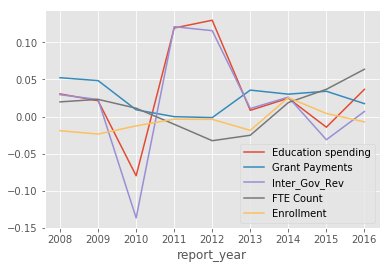

In [47]:
combined.loc["BRIDGEPORT"][["Education spending",
                            "Grant Payments",
                            "Inter_Gov_Rev",
                            "FTE Count",
                            "Enrollment"]].pct_change().plot()

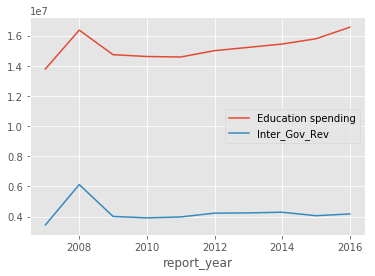

In [48]:
combined.loc["MARLBOROUGH"][["Education spending","Inter_Gov_Rev"]].plot()

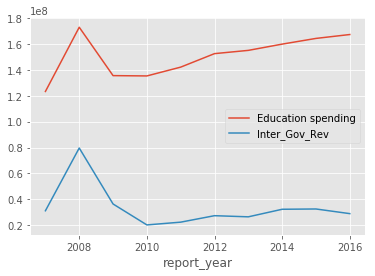

In [49]:
combined.loc["GREENWICH"][["Education spending","Inter_Gov_Rev"]].plot()

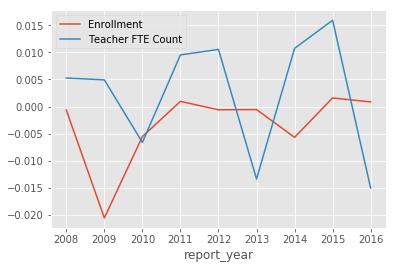

In [50]:
combined.loc["GREENWICH"][["Enrollment","Teacher FTE Count"]].pct_change().plot()

In [51]:
combined[""]

KeyError: ''

# Biggest cuts 

In [ ]:
combined.sort_values(by="grants_change")

In [ ]:
combined.loc["HARTFORD"]["FTE Count"].plot()

In [ ]:
combined.loc["HARTFORD"]["Grant Payments"].plot()

In [ ]:
combined.loc["HARTFORD"]["Inter_Gov_Rev"].plot()

In [ ]:
combined